In [4]:
import pandas as pd
from collections import OrderedDict
import pytz

full_file_path = "SPY.csv"
data = OrderedDict()
data['SPY'] = pd.read_csv(full_file_path, index_col=0, parse_dates=['date'])
data['SPY'] = data['SPY'][["open","high","low","close","volume"]]
print(data['SPY'].head())

               open     high      low    close   volume
date                                                   
1993-01-29  43.9687  43.9687  43.7500  43.9375  1003200
1993-02-01  43.9687  44.2500  43.9687  44.2500   480500
1993-02-02  44.2187  44.3750  44.1250  44.3437   201300
1993-02-03  44.4062  44.8437  44.3750  44.8125   529400
1993-02-04  44.9687  45.0937  44.4687  45.0000   531500


In [15]:
panel = pd.Panel(data)
panel.minor_axis = ["open","high","low","close","volume"]
panel.major_axis = panel.major_axis.tz_localize(pytz.utc)
#panel = panel.to_frame()
#print(panel)

c:\users\jk\anaconda3\envs\trade\lib\site-packages\IPython\core\interactiveshell.py:3326: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [35]:
from zipline.api import order, record, symbol, set_benchmark
import zipline
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import datetime

start = datetime(year=2018, month=2, day=28)
end = datetime(year=2018, month=3, day=1)
a=datetime(2018, 1, 1, 0, 0, 0, 0, pytz.utc)
b=datetime(2018, 3, 1, 0, 0, 0, 0, pytz.utc)
def initialize(context):
    set_benchmark(symbol("SPY"))


def handle_data(context, data):
    order(symbol("SPY"), 10)
    record(SPY=data.current(symbol('SPY'), 'price'))

perf = zipline.run_algorithm(start=a,
                      end=b,
                      initialize=initialize,
                      capital_base=100000,
                      handle_data=handle_data,
                      data=panel)

c:\users\jk\anaconda3\envs\trade\lib\site-packages\pandas\core\generic.py:961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  result = self if inplace else self.copy(deep=copy)
c:\users\jk\anaconda3\envs\trade\lib\site-packages\zipline\data\us_equity_pricing.py:780: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  panel = panel.copy()
c:\users\jk

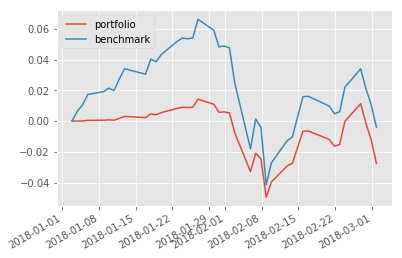

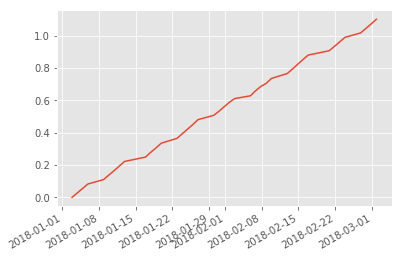

In [36]:
import matplotlib.pyplot as plt
from matplotlib import style


style.use("ggplot")

perf.portfolio_value.pct_change().fillna(0).add(1).cumprod().sub(1).plot(label='portfolio')
perf.SPY.pct_change().fillna(0).add(1).cumprod().sub(1).plot(label='benchmark')
plt.legend(loc=2)

plt.show()
perf.max_leverage.plot()
plt.show()